In [14]:
!apt-get install -q git
!git config --global user.name "IIrootbossII"
!git config --global user.email "dlalstj1715@naver.com"

Reading package lists...
Building dependency tree...
Reading state information...
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [15]:
!git clone https://github.com/IIrootbossII/DLFramework.git

Cloning into 'DLFramework'...


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 111ms/step - accuracy: 0.8132 - loss: 0.5922 - val_accuracy: 0.9834 - val_loss: 0.0568
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 108ms/step - accuracy: 0.9696 - loss: 0.1023 - val_accuracy: 0.9851 - val_loss: 0.0458
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9780 - loss: 0.0749 - val_accuracy: 0.9898 - val_loss: 0.0340
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.9820 - loss: 0.0600 - val_accuracy: 0.9902 - val_loss: 0.0297
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.9853 - loss: 0.0476 - val_accuracy: 0.9915 - val_loss: 0.0272
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9874 - loss: 0.0414 - val_accuracy: 0.9916 - val_loss: 0.0254
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.9892 - loss: 0.0364 - val_accuracy: 0.9923 - val_loss: 0.0248
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 108ms/step - accuracy: 0.9905 - loss: 0

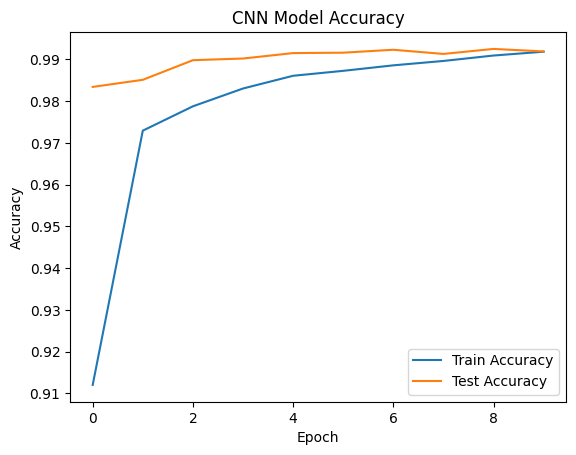

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # 0~1 범위로 정규화
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN 모델 구성
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # 1st Conv Layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),                                              # Pooling
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),                           # 2nd Conv Layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),                                                                   # Flatten Layer
    tf.keras.layers.Dense(128, activation='relu'),                                               # Dense Layer
    tf.keras.layers.Dropout(0.5),                                                                # Dropout for regularization
    tf.keras.layers.Dense(10, activation='softmax')                                              # Output Layer
])

# 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# 정확도 출력
train_acc = history_cnn.history['accuracy'][-1]
test_acc = history_cnn.history['val_accuracy'][-1]
print(f"CNN 모델 훈련 정확도: {train_acc*100:.2f}%, 테스트 정확도: {test_acc*100:.2f}%")

# 학습 결과 그래프
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Test Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8661 - loss: 0.4433 - val_accuracy: 0.9661 - val_loss: 0.1052
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9670 - loss: 0.1073 - val_accuracy: 0.9730 - val_loss: 0.0844
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9783 - loss: 0.0710 - val_accuracy: 0.9764 - val_loss: 0.0763
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9826 - loss: 0.0556 - val_accuracy: 0.9780 - val_loss: 0.0674
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9852 - loss: 0.0444 - val_accuracy: 0.9802 - val_loss: 0.0689
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9868 - loss: 0.0386 - val_accuracy: 0.9786 - val_loss: 0.0742
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9894 - loss: 0.0318 - val_accuracy: 0.9808 - val_loss: 0.0735
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9902 - loss: 0.0309 - va

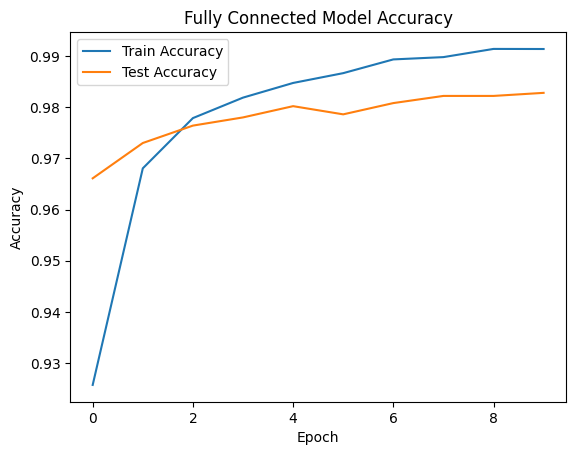

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0  # 0~1 범위로 정규화
x_test = x_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Fully Connected 모델 구성
fc_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)),  # 1st Dense Layer
    tf.keras.layers.Dropout(0.2),                                           # Dropout
    tf.keras.layers.Dense(512, activation='relu'),                          # 2nd Dense Layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')                         # Output Layer
])

# 모델 컴파일
fc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history_fc = fc_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# 정확도 출력
train_acc_fc = history_fc.history['accuracy'][-1]
test_acc_fc = history_fc.history['val_accuracy'][-1]
print(f"Fully Connected 모델 훈련 정확도: {train_acc_fc*100:.2f}%, 테스트 정확도: {test_acc_fc*100:.2f}%")

# 학습 결과 그래프
plt.plot(history_fc.history['accuracy'], label='Train Accuracy')
plt.plot(history_fc.history['val_accuracy'], label='Test Accuracy')
plt.title('Fully Connected Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 정확도 로그 파일 저장
with open('fc_accuracy_log.txt', 'w') as f:
    f.write(str(history_fc.history))